In [1]:
%matplotlib inline
from kid_readout.measurement.io import nc
from kid_readout.measurement import basic, plot_basic
from kid_readout.roach import calculate

In [2]:
ncf = nc.NCFile('/data/readout/2017-01-10_001609_6_dB_dac.nc')

In [3]:
print(ncf.metadata.script_code)

import time

import numpy as np

import kid_readout.equipment.hardware
from kid_readout.interactive import *
from kid_readout.equipment import hardware
from kid_readout.measurement import acquire
from kid_readout.roach import analog


ifboard = analog.HeterodyneMarkI()
led = kid_readout.equipment.hardware.Thing('cold_1550nm_led', {'current': 1e-4})

setup = hardware.Hardware(ifboard,led)

ri = hardware_tools.r2_with_mk1()
ri.iq_delay=-1
ri.set_fft_gain(6)

#initial_f0s = np.load('/data/readout/resonances/2016-06-18-jpl-hex-271-32-high-qi-lo-1210-resonances.npy')
#initial_f0s = initial_f0s/1e6
initial_f0_groups = [#[867.636, 926.75, 1009.072],
                     [1009.072, 1375.513, 1392.178],
                     [1603.5, 1713.939,]]
lo_freqs = [#850.0,
            #1350.0,
            1200.0,
            1780.0]
while True:
    for lo_freq, initial_f0s in zip(lo_freqs,initial_f0_groups):
        initial_f0s = np.array(initial_f0s)
        nf = len(initial_f0s)
        atonce = 4
   

In [4]:
ncf.node_names()

[u'SweepArray0', u'StreamArray1', u'StreamArray2']

In [5]:
ssa = basic.SweepStreamArray(sweep_array=ncf.SweepArray0, stream_array=ncf.StreamArray2)

In [6]:
ssa.num_channels

4

In [7]:
ssa.stream_array.state

StateDict({u'cold_1550nm_led': StateDict({u'current': 0.0001}), u'signal_conditioner': StateDict({u'adc_chain_gain': 0.0, u'description': u'Mark I 1-2 GHz', u'dac_chain_gain': -39})})

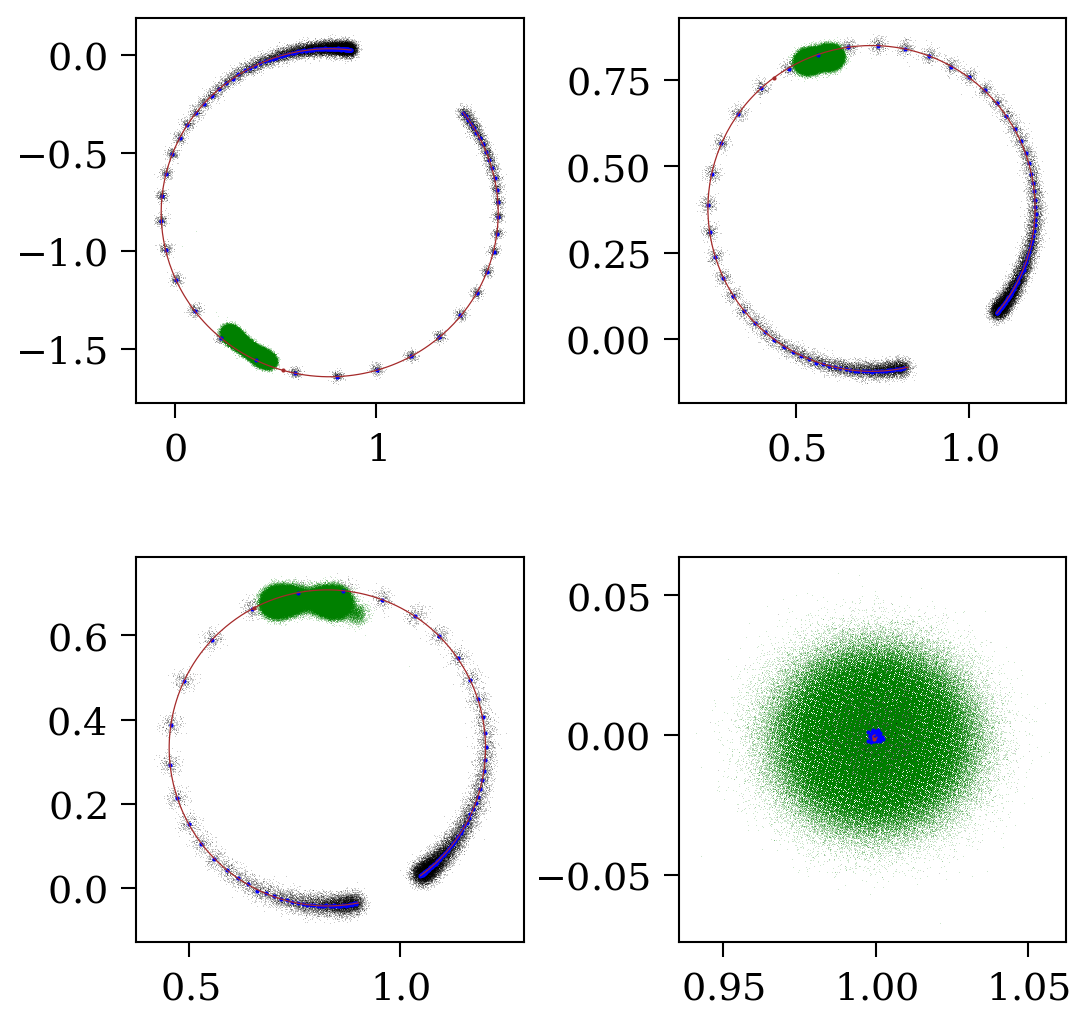

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(4, 4), gridspec_kw={'hspace': 0.4, 'wspace': 0.4})
for n, ax in enumerate(axes.flatten()):
    plot_basic.sss_complex_plane(axis=ax, sss=ssa[n], normalize=True)


In [21]:
sss = ssa[0]
sss.set_S(binned=False)

In [22]:
x_color = 'C0'
q_color = 'C1'

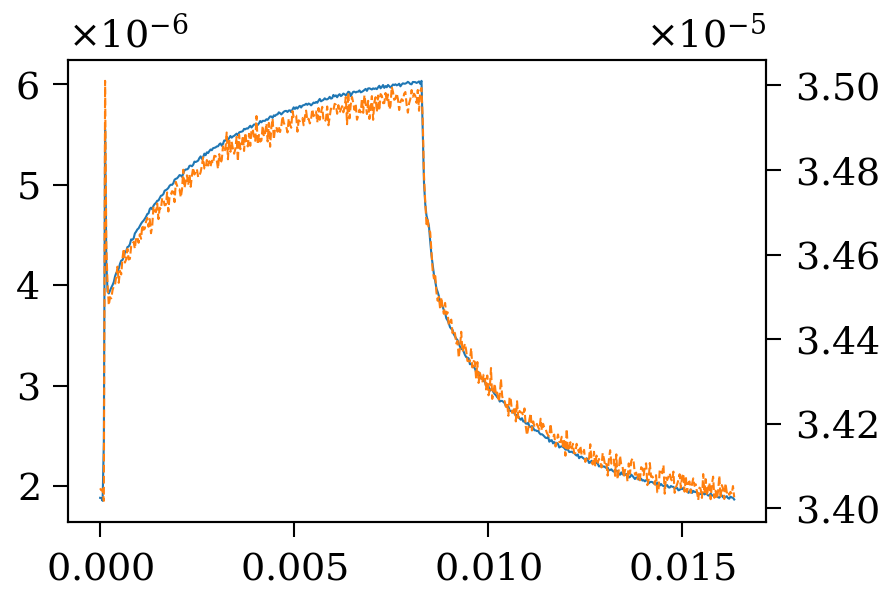

In [23]:
period_samples = calculate.modulation_period_samples(sss.stream.roach_state)
fx = sss.stream.fold(array=sss.x, period_samples=period_samples)
fq = sss.stream.fold(array=sss.q, period_samples=period_samples)

fig, x_ax = plt.subplots()
q_ax = x_ax.twinx()
x_ax.plot(sss.stream.sample_time[:period_samples], fx, linestyle='-', label='$x$', color=x_color)
q_ax.plot(sss.stream.sample_time[:period_samples], fq, linestyle='--', label='$q$', color=q_color)

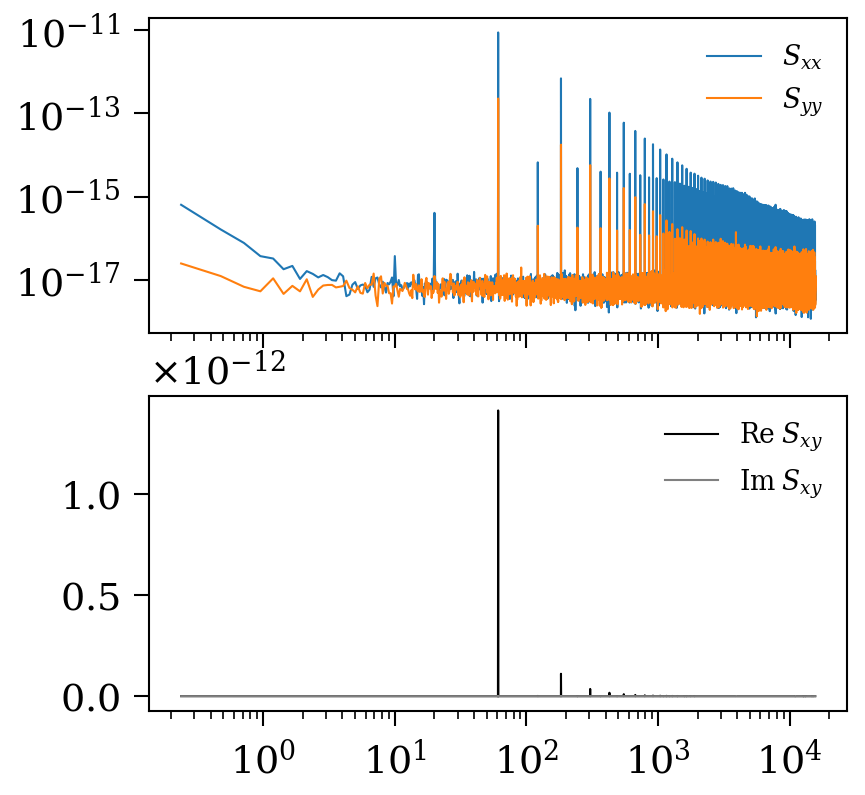

In [12]:
fig, (co_ax, cx_ax) = plt.subplots(2, 1, figsize=(3, 3), sharex=True)
co_ax.set_xscale('log')
co_ax.set_yscale('log')
#cx_ax.set_yscale('symlog')
co_ax.plot(sss.S_frequency, sss.S_xx, label='$S_{xx}$')
co_ax.plot(sss.S_frequency, sss.S_yy, label='$S_{yy}$')
cx_ax.plot(sss.S_frequency, np.real(sss.S_xy), label='$\mathrm{Re} \; S_{xy}$', color='black')
cx_ax.plot(sss.S_frequency, np.imag(sss.S_xy), label='$\mathrm{Im} \; S_{xy}$', color='gray')
co_ax.legend(fontsize='xx-small')
cx_ax.legend(fontsize='xx-small')
#ax.set_xlim(1e1, 2e4);

In [13]:
sss.resonator.Q_e_real

17227.133035251576

In [14]:
sss.resonator.Q_e_imag

33167.728506524116

In [15]:
# This should be the modulation rate in Hz
sss.stream.stream_sample_rate / calculate.modulation_period_samples(sss.stream.roach_state)

61.03515625